<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 19** - November 10, 2015

- Introduction to spectral embedding and spectral clustering

<hr/>

## Doodle poll

Please cast your votes about the clustering portion so far at http://goo.gl/99VYI9

<h1><font color="darkblue">Assignment #3</font></h1>

Total of 14 points. Due by 5pm on Monday, Nov 16th.

### Problem 1

- Different clustering methods have different limitations. Simulate datasets to demonstrate how the clustering methods fail. Describe why they fail.

>0. Create a dataset on which $k$-means clustering fails but GMM works (3)
>0. Create a dataset on which GMM fails but spectral clustering works (4)

> Demonstrate the performance of the methods on each dataset. Use the sklearn routines, e.g., *sklearn.cluster.spectral_clustering()*

### Problem 2

- Compare PCA and to nonlinear dimensionality reduction. 

>0. Simulate a dataset where PCA fails but the spectral embedding captures the relevant features. (3)
>0. Run the analyses to demonstrate the success and the failure. (2)
>0. Describe with your own words what aspects of the original features the embedding coordinates represent well and what not so well. (2)

> Again, feel free to use the sklearn routines, e.g., *sklearn.manifold.spectral_embedding()*



<h1><font color="darkblue">Spectral Methods</font></h1>

## Graph

- Represent connections between objects

> **Vertex**: a node of the graph <br>
> **Edge**: a link between two nodes 

- A graph consists of a set of vertices and a set of edges

>$ G\,(V,E) $

## Similarity Graph

- Connect similar objects in a dataset

> Measure of similarity of the edges




In [14]:
class vert(object):
    def __init__(self,data=None):
        self.data = data

class edge(object):
    def __init__(self, A, B, w=1):
        self.A, self.B = A, B
        self.w = w
        
V = [ vert('zero'), vert('one'), vert('two'), 
      vert('three'), vert('four') ] 

E = [ edge(V[0],V[1]), edge(V[0],V[2]), edge(V[0],V[3]), 
      edge(V[1],V[3]),
      edge(V[2],V[3]), edge(V[2],V[4]), 
      edge(V[3],V[4]) ]

for e in E: 
    print e.A.data, '\t--<%.1f>--\t' % e.w, e.B.data

zero 	--<1.0>--	one
zero 	--<1.0>--	two
zero 	--<1.0>--	three
one 	--<1.0>--	three
two 	--<1.0>--	three
two 	--<1.0>--	four
three 	--<1.0>--	four


## Adjacency Matrix

- Are two vertices connected?

> Encode it in a $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

### For example,

- The previous case becomes 

>$ A = \left( \begin{array}{ccc}
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 1 & 0  \\
1 & 0 & 0 & 1 & 1  \\
1 & 1 & 1 & 0 & 1  \\
0 & 0 & 1 & 1 & 0  \\
\end{array} \right)$

## Spectral Clustering

- How to cut the graph into pieces with minimal "damage"

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Min_cut_example.svg/330px-Min_cut_example.svg.png align=left width=220>



## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$

- What's so special abou this?!

## An Interesting Property

- For any $x$ the bilinear expression has a familiar formula

>$\displaystyle x^T L\,x = \sum_{i}^n d_{ii} x_i^2 - \sum_{i,j}^n  a_{ij}\,x_i x_j $

>$\displaystyle \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i}^n d_{ii} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{j}^n d_{jj} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i,j}^n a_{ij} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{i,j}^n a_{ij} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 $


- Which is


>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} (x_i\!-\!x_j)^2$

## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- And the result is again 

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} w_{ij}\,(x_i\!-\!x_j)^2$

## Minimization

- Solutions is the smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution (constant) <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations


## Variants

 - Simple Laplacian
 
 >$ L = D-W$
 
 - Normalized Laplacian
 
 >$ L_N = D^{-1/2}\,L\,D^{-1/2} = I -  D^{-1/2}\,W\,D^{-1/2}$
 
 - Relaxed Laplacian
 
 >$ L_{\rho} = L - \rho D$
 
 - Beltrami, etc...

## Demo from Scratch

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


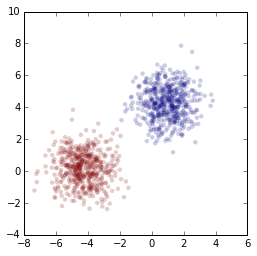

In [16]:
from sklearn import datasets
np.random.seed(3)

X, C = datasets.make_blobs(n_samples=1000, centers=2)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], c=C, alpha=0.2, edgecolor='none');

(1000, 2) (1, 1000, 2) (1000, 1, 2)
(1000, 1000, 2)
(1000, 1000)
Symmetric? True


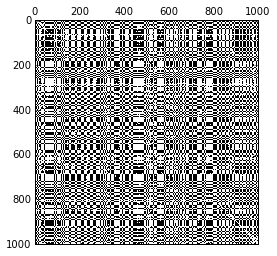

In [17]:
# Simple adjacency matrix based on distance threshold
m1 = X[np.newaxis, :, :]
m2 = X[:, np.newaxis, :]
print X.shape, m1.shape, m2.shape
d = m1 - m2
print d.shape
d *= d
r2 = d.sum(axis=2)
print r2.shape
A = (r2>1e-15) & (r2<9)
A = A.astype(np.float)
print 'Symmetric?', np.allclose(A,A.T)
spy(A);

-3.23691889867e-13 2.51045552984 (1000,) (1000, 1000)


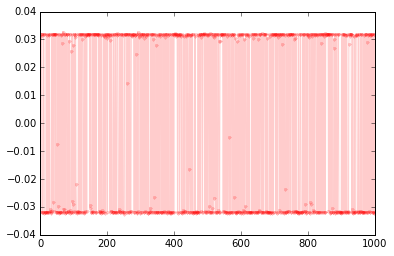

In [18]:
D = A.sum(axis=0)
D = diag(D)

L = D - A

w, v = linalg.eigh(L)


print w[0], w[1], w.shape, v.shape
#plot(w)

figure()
plot(v[:,1], '.-r', alpha=0.2);

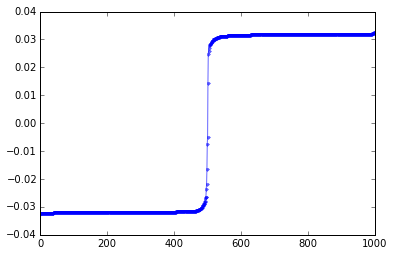

In [19]:
s = argsort(v[:,1])
plot(v[s,1], '.-b', alpha=0.6);

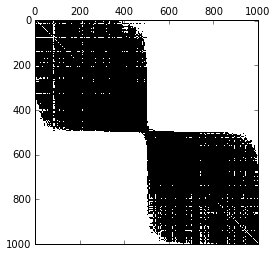

In [20]:
i,j = meshgrid(s,s)
spy(A[i,j]);

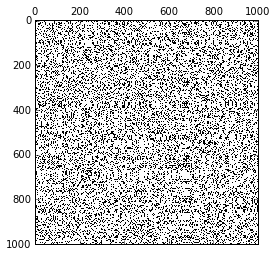

In [21]:
# Practice
url = 'https://goo.gl/uNxFn2'
A = np.load('files/Class19-Adj.npy')
spy(A)